In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers


In [3]:
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )
    

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
 for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 2 1 1 1 2 1 1 0 0 0 1 1 1 1 1 0]


In [9]:
import psutil
print(f"Memory Usage: {psutil.virtual_memory().percent}%")

Memory Usage: 53.8%


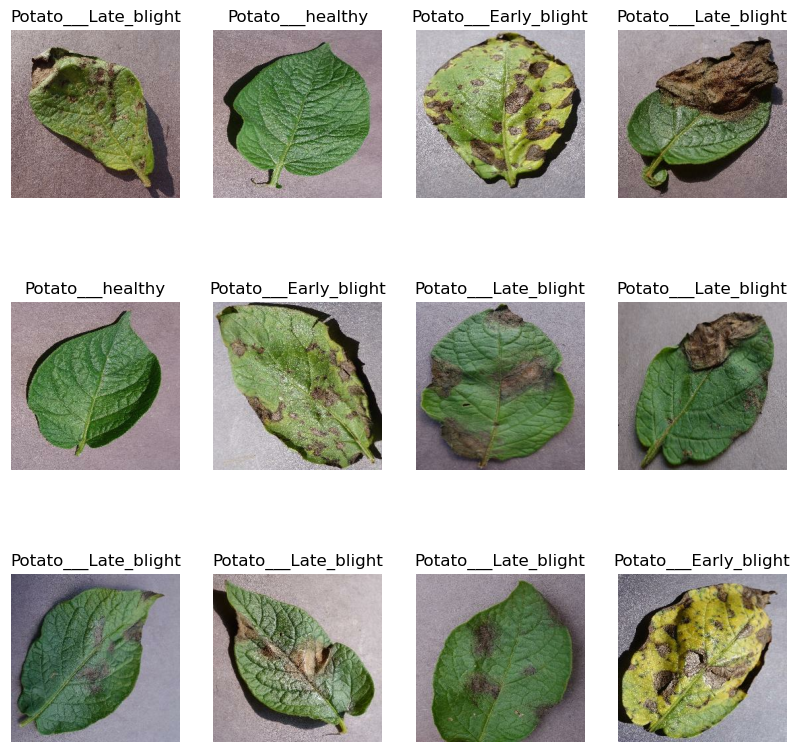

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")  # Corrected placement
plt.show()

In [11]:
len(dataset)

68

In [12]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds=dataset.take(54)
len(train_ds)


54

In [14]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [15]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size=int(train_split * ds_size)
    val_size=int(val_split * ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds
    

In [19]:
train_ds,val_ds,test_ds = get_dataset_partition_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [25]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

     
    

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 161s 3s/step - loss: 0.8960 - accuracy: 0.4907 - val_loss: 0.8744 - val_accuracy: 0.4740
Epoch 2/50
54/54 [==============================] - 99s 2s/step - loss: 0.6199 - accuracy: 0.7147 - val_loss: 0.3459 - val_accuracy: 0.8854
Epoch 3/50
54/54 [==============================] - 72s 1s/step - loss: 0.3430 - accuracy: 0.8530 - val_loss: 0.2460 - val_accuracy: 0.8958
Epoch 4/50
54/54 [==============================] - 74s 1s/step - loss: 0.2338 - accuracy: 0.9155 - val_loss: 0.2074 - val_accuracy: 0.9167
Epoch 5/50
54/54 [==============================] - 74s 1s/step - loss: 0.2124 - accuracy: 0.9219 - val_loss: 0.2060 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 77s 1s/step - loss: 0.1760 - accuracy: 0.9277 - val_loss: 0.1463 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 75s 1s/step - loss: 0.1249 - accuracy: 0.9566 - val_loss: 0.0797 - val_accuracy: 0.9792
Epoch 8/50
54/54 [=

In [30]:
 scores=model.evaluate(test_ds)

8/8 [==============================] - 7s 331ms/step - loss: 0.0854 - accuracy: 0.9766


In [31]:
scores

[0.08536621183156967, 0.9765625]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
len(history.history['accuracy'])

50

In [36]:
history.history['accuracy']

[0.49074074625968933,
 0.7146990895271301,
 0.8530092835426331,
 0.9155092835426331,
 0.921875,
 0.9276620149612427,
 0.9565972089767456,
 0.9600694179534912,
 0.9589120149612427,
 0.9716435074806213,
 0.9809027910232544,
 0.9814814925193787,
 0.9837962985038757,
 0.9745370149612427,
 0.9733796119689941,
 0.9884259104728699,
 0.9866898059844971,
 0.9814814925193787,
 0.9965277910232544,
 0.9930555820465088,
 0.9739583134651184,
 0.9878472089767456,
 0.9907407164573669,
 0.9774305820465088,
 0.9895833134651184,
 0.9959490895271301,
 0.9988425970077515,
 0.9982638955116272,
 0.9791666865348816,
 0.9809027910232544,
 0.9988425970077515,
 0.9965277910232544,
 0.9994212985038757,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

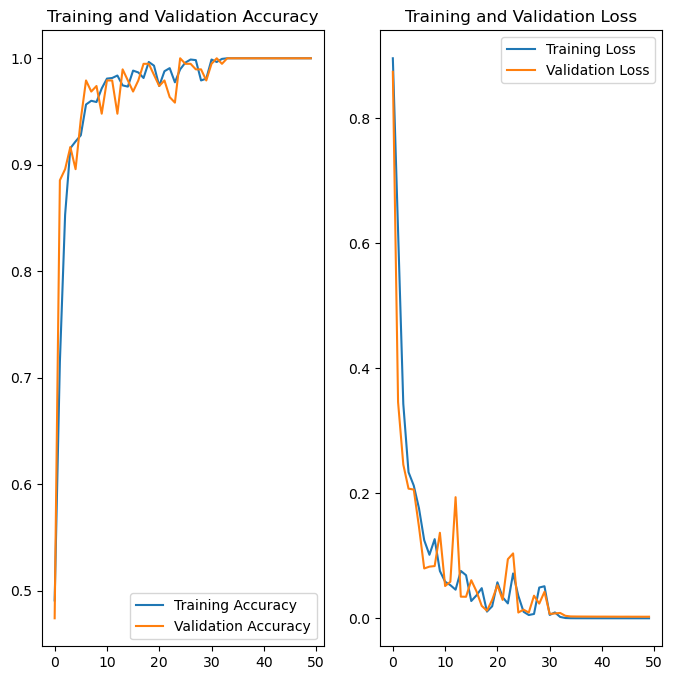

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 374ms/step
predicted label: Potato___Late_blight


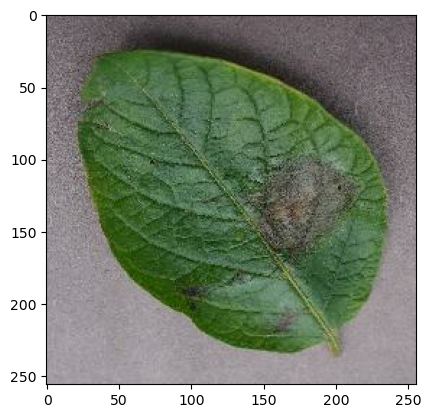

In [44]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 50ms/step


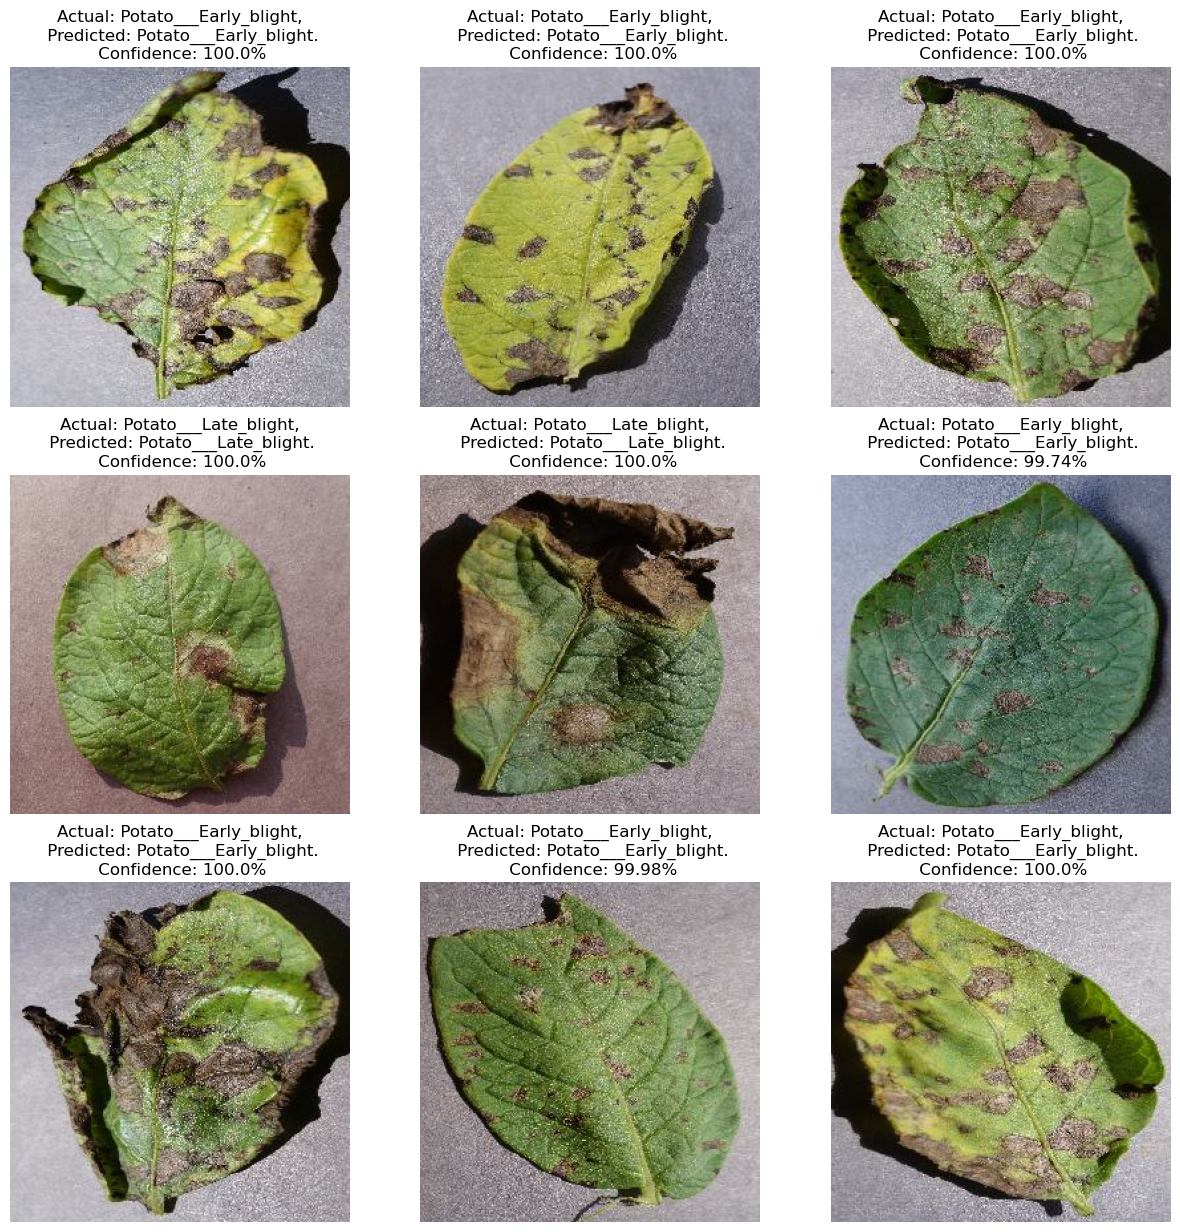

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [51]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets


In [49]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [5]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("potato_disease_model.keras")  # or .keras if converted

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path, target_size=(224, 224)):  # Adjust target_size based on your model input
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize (if required by your model)
    return img_array
    
def predict_image(img_path, model):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    
    # If using a classification model, decode the output
    predicted_class = np.argmax(prediction)  # Get the class index
    
    # Map index to class labels (modify this based on your dataset)
    class_labels = ["Healthy", "Early Blight", "Late Blight"]  # Example labels
    predicted_label = class_labels[predicted_class]

    return predicted_label, prediction

# Example usage
img_path = r"C:\Users\HP\Downloads\potato-leaf-isolated-on-white-260nw-2299088565.webp" # Replace with your image path
label, confidence = predict_image(img_path, model)
print(f"Predicted Class: {label}, Confidence: {confidence}")
import matplotlib.pyplot as plt



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
Predicted Class: Healthy, Confidence: [[5.4129392e-01 4.5870608e-01 5.3113435e-08]]


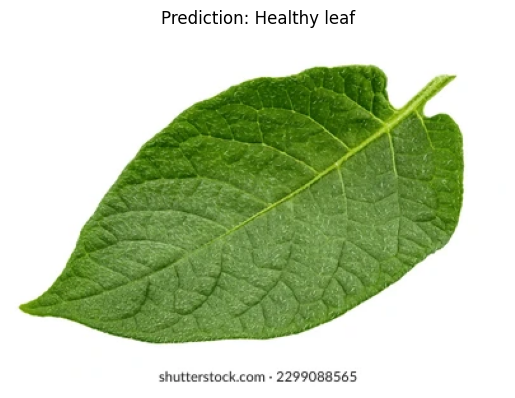

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def display_prediction(img_path, label):
    try:
        # Load and display the image
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.title(f"Prediction: {label}")
        plt.axis("off")
        plt.show()
    except Exception as e:
        print(f"Error displaying image: {e}")

# Define img_path and label before calling the function
img_path = r"C:\Users\HP\Downloads\potato-leaf-isolated-on-white-260nw-2299088565.webp" # Replace with the actual image path
label = "Healthy leaf"  # Replace with the actual label

# Example usage
display_prediction(img_path, label)